In [1]:
from policy_learning.representation.model import Encoder, ResidualBlock, Discriminator, Generator, weights_init_normal, LambdaLR
#
# from models import Encoder, ResidualBlock, Discriminator, Generator, weights_init_normal, LambdaLR
from representation_learning.unit.datasets import ImageDataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision
from torchvision.utils import save_image, make_grid

ModuleNotFoundError: No module named 'torch'

In [2]:
shared_dim = 16
dim = 16
n_downsample = 3
img_height = 128
img_width = 128
channels = 3
input_shape = (channels, img_height, img_width)

In [3]:
shared_E = ResidualBlock(features=shared_dim)
E1 = Encoder(dim=dim, n_downsample=n_downsample, shared_block=shared_E)
E2 = Encoder(dim=dim, n_downsample=n_downsample, shared_block=shared_E)
shared_G = ResidualBlock(features=shared_dim)
G1 = Generator(dim=dim, n_upsample=n_downsample, shared_block=shared_G)
G2 = Generator(dim=dim, n_upsample=n_downsample, shared_block=shared_G)
D1 = Discriminator(input_shape)
D2 = Discriminator(input_shape)

In [4]:
E1 = E1.cpu()
E2 = E2.cpu()
G1 = G1.cpu()
G2 = G2.cpu()
D1 = D1.cpu()
D2 = D2.cpu()

In [6]:
E1.load_state_dict(torch.load("E1_170.pth",  map_location=torch.device('cpu')))
E2.load_state_dict(torch.load("E2_170.pth",  map_location=torch.device('cpu')))
G1.load_state_dict(torch.load("G1_170.pth",  map_location=torch.device('cpu')))
G2.load_state_dict(torch.load("G2_170.pth",  map_location=torch.device('cpu')))
D1.load_state_dict(torch.load("D1_170.pth",  map_location=torch.device('cpu')))
D2.load_state_dict(torch.load("D1_170.pth",  map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
transformer = [
    transforms.Resize(int(img_height * 1.12), Image.BICUBIC),
    transforms.RandomCrop((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]

In [46]:
image = Image.open('/home/robertmoni/projects/PyTorch-GAN/data/dt_sim2real/test/B/s_2.png')

In [49]:
transformer = transforms.Compose([transforms.Resize(int(img_height * 1.12), Image.BICUBIC),
                                          transforms.RandomCrop((img_height, img_width)),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                          ])

observation = transformer(image)

observation = observation.unsqueeze(0)

with torch.no_grad():
    _, Z1 = E1(observation )

        # print("Observation wrapping")
        # print("Observation wrapping")
        # print("Observation wrapping")
        # print("Observation wrapping")
        # print("flatten", flatten(E1).shape)
observation = Z1.flatten()
print("shapeeeeeeee \n \n \n \n \n \n \n \n \n ", observation.shape)
observation = observation.unsqueeze(0).numpy()

shapeeeeeeee 
 
 
 
 
 
 
 
 
  torch.Size([4096])


In [53]:
observation.min()

-10.4003525

In [8]:
val_dataloader = DataLoader(
    ImageDataset("../../data/dt_sim2real", transforms_=transformer, unaligned=True, mode="test"),
    batch_size=5,
    shuffle=True,
    num_workers=1,
)

In [9]:
next(iter(val_dataloader))["A"].shape

torch.Size([5, 3, 128, 128])

In [10]:
imgs = next(iter(val_dataloader))
X1 = Variable(imgs["A"].type(torch.Tensor))
X2 = Variable(imgs["B"].type(torch.Tensor))
_, Z1 = E1(X1)
_, Z2 = E2(X2)
fake_X1 = G1(Z1)
fake_X2 = G2(Z2)
img_sample = torch.cat((X1.data, fake_X2.data, X2.data, fake_X1.data), 0)
save_image(img_sample,"sample_image.png", nrow=5, normalize=True)

In [11]:
Z1.shape

torch.Size([5, 16, 16, 16])

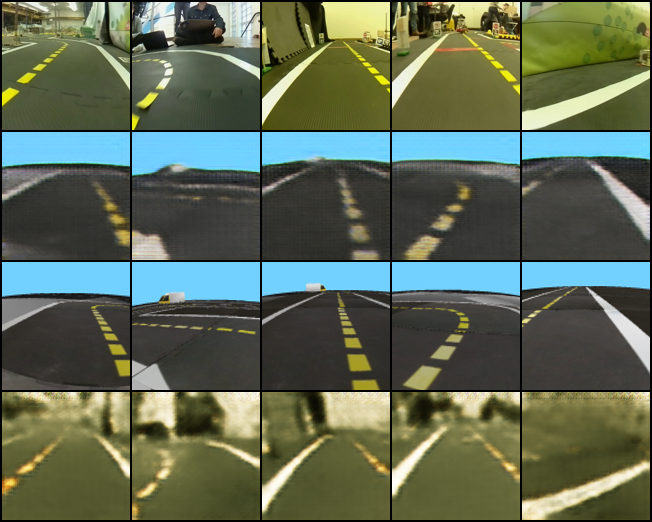

In [12]:

samples = make_grid(img_sample, nrow=5,normalize=True)
ndarr = samples.mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()
Image.fromarray(ndarr)